In [1]:
import json

from pathlib import Path

import click
import pandas as pd
import torch
import torch.nn.functional as F

from torch.autograd import grad
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR
from tqdm.auto import tqdm

from src.experiments import log, load_model, save_data, initialize_sample_images


In [4]:
models = [
    load_model({
        "model_type": "ClassificationNet",
        "checkpoint": f"../models/binary_mnist/epoch={i}-val_accuracy=0.99.ckpt"
    })
    for i in [44, 47]
]


In [5]:
@torch.no_grad()
def get_angles(model) -> list[torch.Tensor]:
    return [
        p / torch.norm(p, p=1)
        for p in model.parameters()
    ]


@torch.no_grad()
def get_norms(model) -> list[torch.Tensor]:
    return [
        torch.norm(p, p=2)
        for p in model.parameters()
    ]

In [6]:
angles = list(map(get_angles, models))

In [7]:
differences = [
    torch.norm(a - b)
    for a, b in zip(*angles)
]

(array([20.,  4.,  2.,  0.,  1.,  0.,  1.,  3.,  0.,  0.,  2.,  4.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.00020278, 0.00106626, 0.00192974, 0.00279322, 0.0036567 ,
        0.00452017, 0.00538365, 0.00624713, 0.00711061, 0.00797408,
        0.00883756, 0.00970104, 0.01056452, 0.01142799, 0.01229147,
        0.01315495, 0.01401843, 0.01488191, 0.01574538, 0.01660886,
        0.01747234, 0.01833582, 0.01919929, 0.02006277, 0.02092625,
        0.02178973, 0.02265321, 0.02351668, 0.02438016, 0.02524364,
        0.02610712]),
 <BarContainer object of 30 artists>)

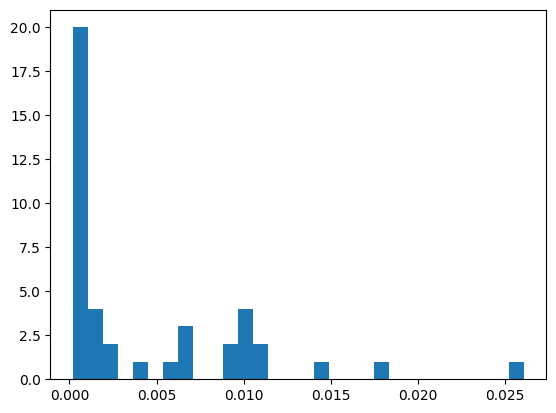

In [8]:
import matplotlib.pyplot as plt


plt.hist(differences, bins=30)

tensor(0.0585)

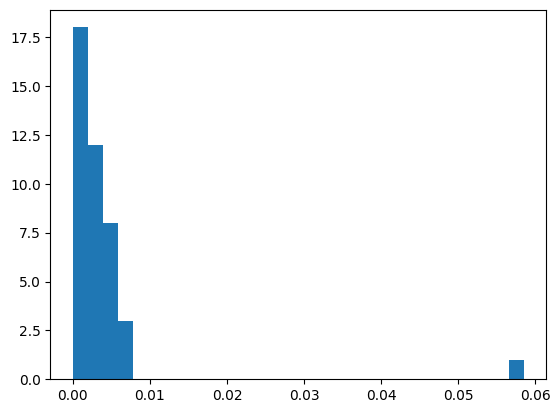

In [9]:
norms = list(map(get_norms, models))

plt.hist([abs(a - b) for a, b in zip(*norms)], bins=30)
max(abs(a - b) for a, b in zip(*norms))

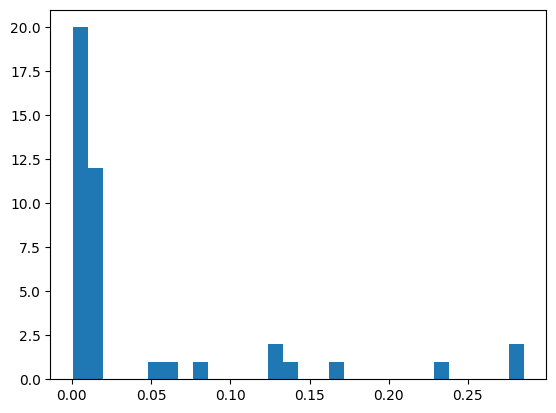

tensor(0.2854)

In [10]:
with torch.no_grad():
    differences = [
        torch.norm(a - b)
        for a, b in zip(models[0].parameters(), models[1].parameters())
    ]

plt.hist(differences, bins=30)
plt.show()
max(differences)